# Train Haiku Model

In [1]:
import sys

from fastai.text import *
import fastai
print(fastai.__version__)

sys.path.append('..')
from custom_callbacks import *

1.0.51


## Setting

In [2]:
path = Path('../data')

model_fn = 'awd_second_phase'

## Build Basic Language Model

In [3]:
data_lm = TextLMDataBunch.from_csv(path, 'haikus.csv', bptt=32, 
                                   bs = 256,
                                   max_vocab=10000, valid_pct=0.02,
                                   include_eos=True, include_bos=True)

In [4]:
len(data_lm.train_ds), len(data_lm.valid_ds)

(344676, 7035)

In [5]:
data_lm.show_batch(2)

idx,text
0,"getting filled up \n like crazy right now . \n xxeos xxbos [ deleted ] xxmaj how much ? \n xxmaj they do n't correct the problem , \n only the xxunk"
1,my god ! \n xxmaj it is the current year . \n xxeos xxbos xxmaj once you go xxmaj johnny \n xxmaj mac ! ! xxmaj you never go back ! !


In [6]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5).load(model_fn);

## Start Fitting

In [7]:
print(learn.predict('', n_words=35, temperature=0.5))

 xxbos But i do n't think it 's 
  the best of the realize . 
  The us who said it . 
  xxeos xxbos It 's not a ] reason 
 


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


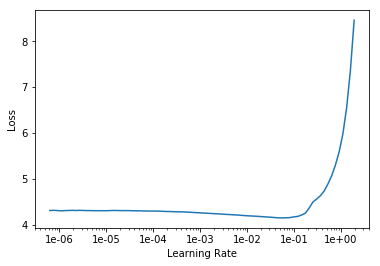

In [8]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(10, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,3.400027,3.551658,0.375000,06:20
1,3.120114,3.198318,0.375000,06:23
2,2.977188,3.023378,0.500000,06:24
3,2.899378,3.007133,0.468750,06:23
4,2.831548,2.957135,0.437500,06:24
5,2.773860,2.951493,0.500000,06:24
6,2.719429,2.992108,0.468750,06:24
7,2.679986,2.954947,0.468750,06:24
8,2.639176,2.936638,0.468750,06:24
9,2.622760,2.939124,0.468750,06:24


In [10]:
learn.save('awd_third_phase')

In [11]:
learn.export('final_export')

In [18]:
print(learn.predict('', n_words=35, temperature=0.5))

 xxbos It 's a bit pricey 
  but it 's really good to see 
  the New York City . 
  xxeos xxbos It 's not the same thing 
 
